In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.rename(columns={'Genre':"Gender"},inplace=True)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.shape

(200, 5)

In [9]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


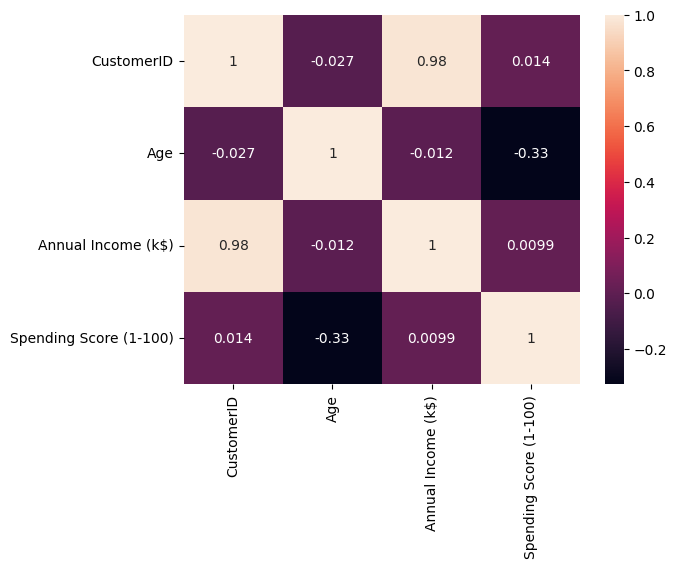

In [11]:
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

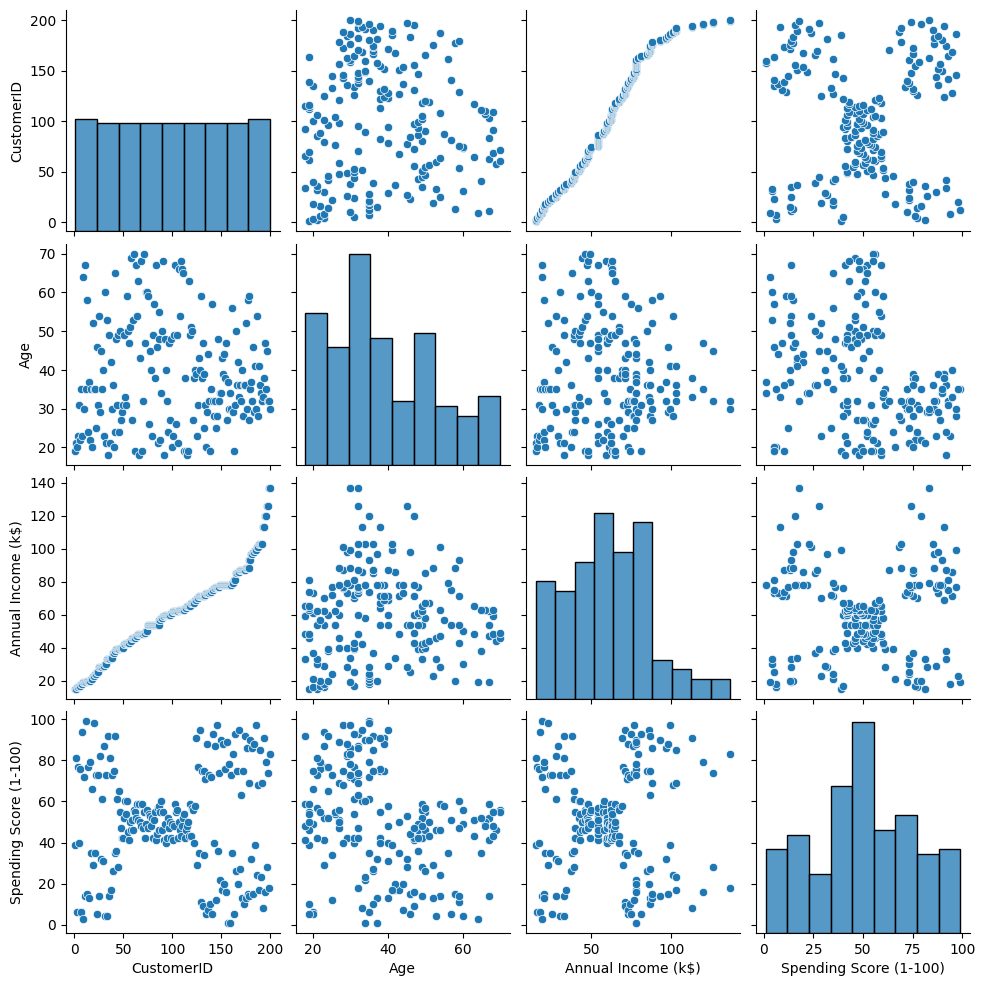

In [12]:
sns.pairplot(df)

<Axes: >

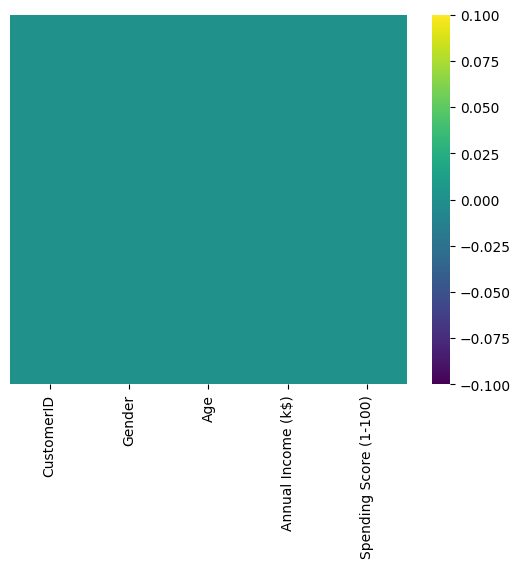

In [13]:
sns.heatmap(df.isnull(),cmap="viridis",yticklabels=False)

<Axes: xlabel='Gender', ylabel='count'>

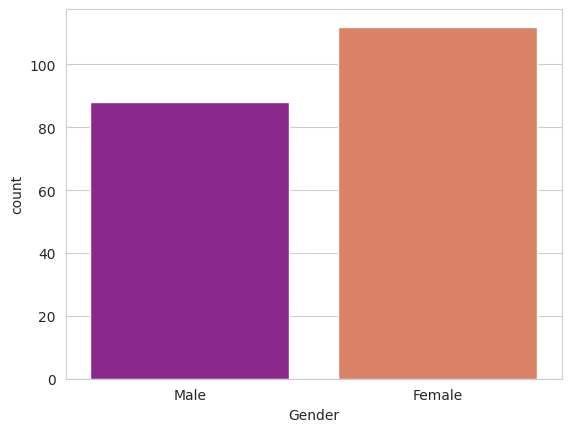

In [14]:
sns.set_style('whitegrid')    # male & female student representaion on countplot
sns.countplot(x='Gender',data=df,palette='plasma')

In [15]:
male_customer=len(df[df["Gender"]=="Male"])
female_customer=len(df[df["Gender"]=="Female"])
print("No of male customer:",male_customer)
print("No of female customer:",female_customer)

No of male customer: 88
No of female customer: 112


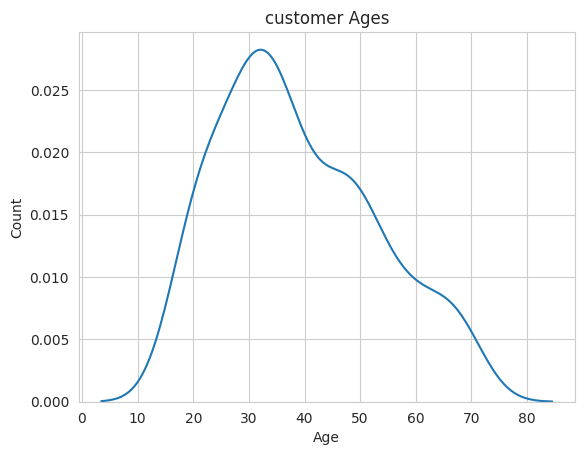

In [16]:
b = sns.kdeplot(df['Age'])    # Kernel Density Estimations
b.axes.set_title('customer Ages')
b.set_xlabel('Age')
b.set_ylabel('Count')
plt.show()

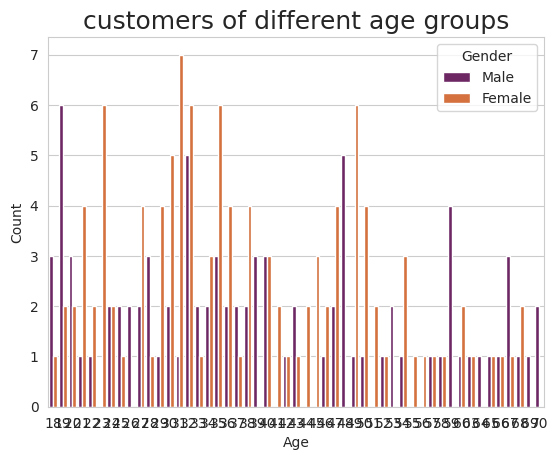

In [19]:
b=sns.countplot(x="Age",hue="Gender",data=df,palette='inferno')
b.axes.set_title("customers of different age groups",fontsize=18)
b.set_xlabel("Age")
b.set_ylabel("Count")
plt.show()

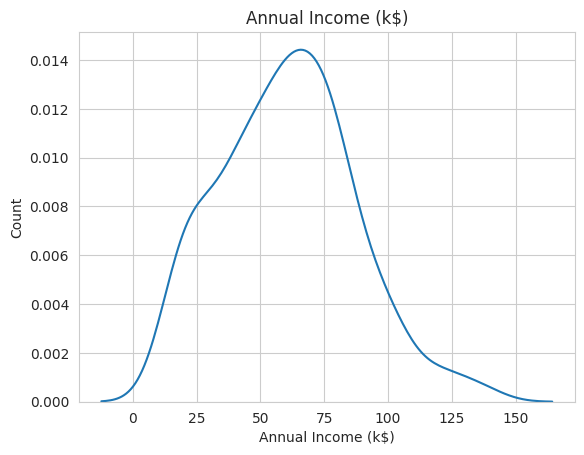

In [20]:
b = sns.kdeplot(df['Annual Income (k$)'])    # Kernel Density Estimations
b.axes.set_title('Annual Income (k$)')
b.set_xlabel('Annual Income (k$)')
b.set_ylabel('Count')
plt.show()

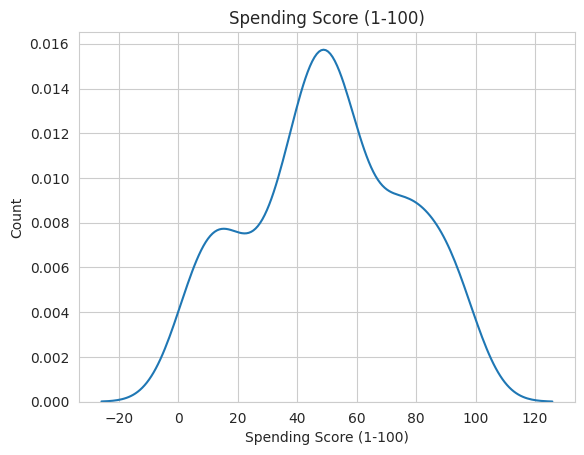

In [21]:
b = sns.kdeplot(df['Spending Score (1-100)'])    # Kernel Density Estimations
b.axes.set_title('Spending Score (1-100)')
b.set_xlabel('Spending Score (1-100)')
b.set_ylabel('Count')
plt.show()

In [22]:
x=df.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [24]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [25]:
wcss

[400.00000000000006,
 269.1425070447922,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.10377812115058,
 44.91118554999014,
 37.15135706793107,
 33.85410621736369,
 29.076176851244277]

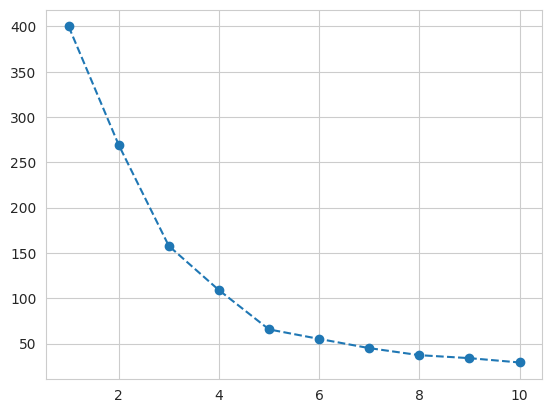

In [26]:
plt.plot(range(1,11),wcss,'o--')
plt.show()

In [27]:
kmeans=KMeans(n_clusters=5,random_state=1)
ylabel=kmeans.fit_predict(x)

In [28]:
ylabel

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [29]:
df["ykmeans"]=ylabel

In [30]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ykmeans
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [31]:
kmeans.cluster_centers_

array([[-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536]])

In [32]:
df["ykmeans"].value_counts()

2    81
3    39
1    35
4    23
0    22
Name: ykmeans, dtype: int64

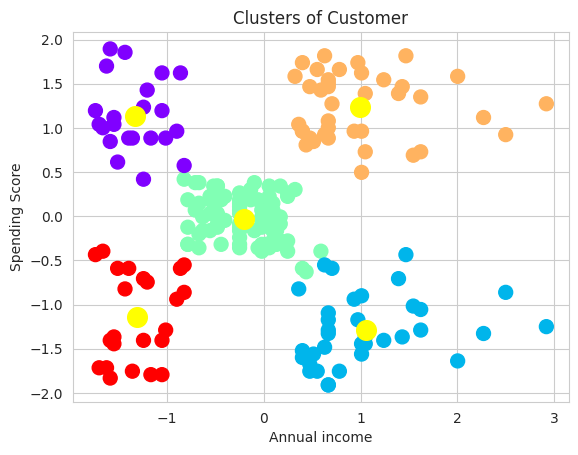

In [33]:
plt.scatter(x[:,0],x[:,1],c=ylabel,s=100,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="yellow",s=200)
plt.xlabel("Annual income")
plt.ylabel("Spending Score")
plt.title("Clusters of Customer")
plt.show()

In [34]:
df[df.ykmeans==1].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),ykmeans
count,35.000000,35.000000,35.000000,35.000000,35.0
mean,164.371429,41.114286,88.200000,17.114286,1.0
std,21.457325,11.341676,16.399067,9.952154,0.0
min,125.000000,19.000000,70.000000,1.000000,1.0
25%,148.000000,34.000000,77.500000,10.000000,1.0
50%,165.000000,42.000000,85.000000,16.000000,1.0
75%,182.000000,47.500000,97.500000,23.500000,1.0
max,199.000000,59.000000,137.000000,39.000000,1.0


In [35]:
df.groupby("ykmeans")[["Annual Income (k$)","Spending Score (1-100)"]].mean()

,Annual Income (k$),Spending Score (1-100)
ykmeans,,
0,25.727273,79.363636
1,88.200000,17.114286
2,55.296296,49.518519
3,86.538462,82.128205
4,26.304348,20.913043


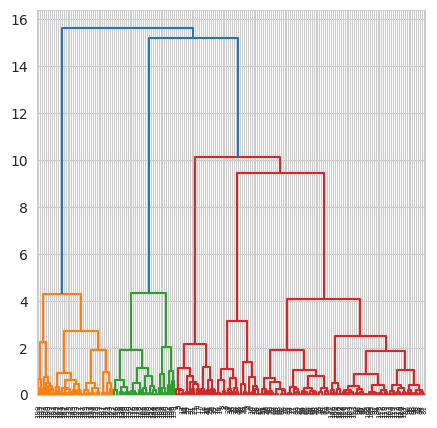

In [36]:
from scipy.cluster import hierarchy as hi
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
lk=hi.linkage(x,method="ward")
plt.figure(figsize=(5,5))
ddg=hi.dendrogram(lk)
plt.show()